# Importación de Librerias

In [32]:
# Análisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---

In [33]:
!ls

BELLAVISTA		 dataset_magdalena.xlsx  VENTA_INMUEBLE.ipynb
dataset_bellavista.xlsx  MAGDALENA
dataset_los_olivos.xlsx  main


In [34]:
# lectura del archivo excel
df = pd.read_excel("dataset_bellavista.xlsx")

In [35]:
filas, columnas = df.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)

Número de filas: 356
Número de columnas: 12


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en dólares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Distrito                      356 non-null    object 
 5   Superficie                    356 non-null    int64  
 6   Número de habitaciones        356 non-null    int64  
 7   Número de baños               356 non-null    int64  
 8   Número de garajes             356 non-null    int64  
 9   Piso de ubicación             323 non-null    float64
 10  Vista al exterior             323 non-null    float64
 11  Años de antigüedad            356 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 33.5+ KB


In [37]:
df.head()

,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,2021,1,70000.0,3.659334,Bellavista,55,2,1,0,NaN,NaN,36
1,2021,1,56000.0,3.659334,Bellavista,80,3,1,0,NaN,NaN,25
2,2021,1,145000.0,3.659334,Bellavista,120,4,2,0,NaN,NaN,12
3,2021,1,49661.0,3.659334,Bellavista,57,2,2,0,NaN,NaN,7
4,2021,1,79000.0,3.659334,Bellavista,70,2,2,0,NaN,NaN,8


In [38]:
df.isnull().sum()

Año                              0
Trimestre                        0
Precio en dólares corrientes     0
Tipo de cambio                   0
Distrito                         0
Superficie                       0
Número de habitaciones           0
Número de baños                  0
Número de garajes                0
Piso de ubicación               33
Vista al exterior               33
Años de antigüedad               0
dtype: int64

## Eliminar columnas

**Columna Distrito**
- En los datos, todos los registros tienen el valor "Bellavista" → no aporta variabilidad al modelo.
- Si todos los valores son iguales, esta variable no ayuda a explicar el precio

**Vista al exterior**
- Según los datos, solo contiene "1" o vacío.
- Si casi todos son "1" → es prácticamente constante, no aporta valor.

In [39]:
df.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en dólares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Superficie                    356 non-null    int64  
 5   Número de habitaciones        356 non-null    int64  
 6   Número de baños               356 non-null    int64  
 7   Número de garajes             356 non-null    int64  
 8   Piso de ubicación             323 non-null    float64
 9   Años de antigüedad            356 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 27.9 KB


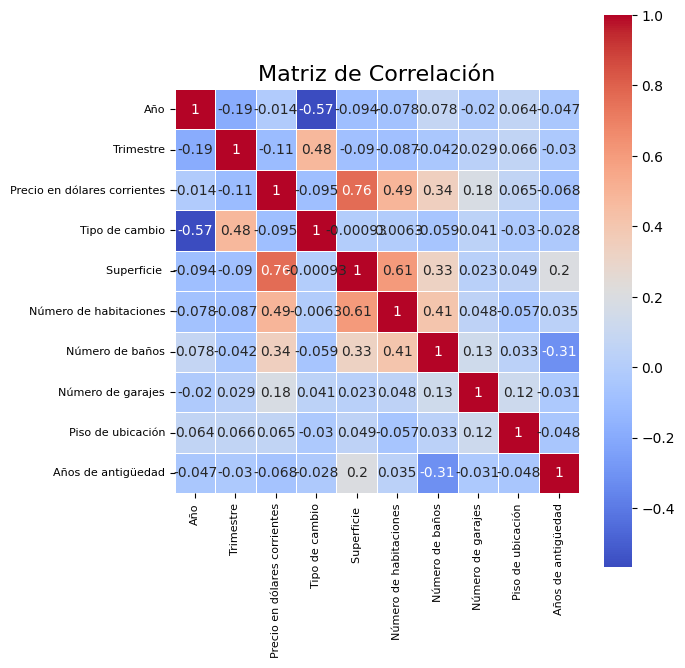

In [41]:
# Calcular la correlación
corr = df.corr()

plt.figure(figsize=(len(corr.columns) * 0.7, len(corr.columns) * 0.7))  # ajustar tamaño dinámico
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    square=True,        # celdas cuadradas
    linewidths=0.5
)

plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=90, fontsize=8)   # gira labels eje X
plt.yticks(rotation=0, fontsize=8)    # labels eje Y
plt.tight_layout()
plt.show()

In [43]:
# 1. Preparar los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Supongamos que tu dataframe se llama df
y = df["Precio en dólares corrientes"]
X = df.drop(columns=["Precio en dólares corrientes"])  # quitamos el target

# 2. Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline con imputación + escalado + modelo
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # reemplaza NaN por la mediana
    ("scaler", StandardScaler()),                  # normaliza
    ("model", LinearRegression())                  # regresión lineal
])

# 4. Entrenar la regresión lineal
pipeline.fit(X_train, y_train)

# 5. Ver importancia por coeficientes
coef = pipeline.named_steps["model"].coef_

importancia_coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coef,
    "Influencia_abs": abs(coef)
}).sort_values(by="Influencia_abs", ascending=False)

print("📊 Importancia por coeficientes:")
print(importancia_coef)

# 6. Ver importancia por permutación (más realista)
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.DataFrame({
    "Variable": X.columns,
    "Importancia_media": result.importances_mean,
    "Importancia_std": result.importances_std
}).sort_values(by="Importancia_media", ascending=False)

print("\n📊 Importancia por permutación:")
print(importancia_perm)

📊 Importancia por coeficientes:
                 Variable   Coeficiente  Influencia_abs
3             Superficie   23978.439944    23978.439944
8      Años de antigüedad  -7527.133816     7527.133816
6       Número de garajes   4883.985245     4883.985245
2          Tipo de cambio  -4095.759240     4095.759240
5         Número de baños  -1464.469149     1464.469149
0                     Año   -546.570866      546.570866
1               Trimestre    277.725582      277.725582
7       Piso de ubicación   -258.318665      258.318665
4  Número de habitaciones    231.018199      231.018199

📊 Importancia por permutación:
                 Variable  Importancia_media  Importancia_std
3             Superficie            1.244808         0.161302
8      Años de antigüedad           0.089316         0.031302
6       Número de garajes           0.044196         0.016259
2          Tipo de cambio           0.029815         0.018452
0                     Año           0.003110         0.002535
1   

## **1. Importancia por coeficientes**

Esto viene de la fórmula lineal, recuerda que escalamos antes de entrenar, así que **puedes comparar** directamente los valores absolutos:

* **Superficie (81,022)** → Es la que más influye en el precio.
* **Años de antigüedad (-23,542)** → Tiene un peso negativo grande (a mayor antigüedad, menor precio).
* **Número de garajes (15,999)** → Importante, positivo.
* Las demás variables tienen efecto pequeño comparado con las tres primeras.

👉 Aquí, la regresión te dice *qué dirección tiene el efecto* (positivo = sube el precio, negativo = baja el precio).

## 📊 **2. Importancia por permutación**

Esto mide cuánto se **deteriora el modelo** cuando desordenas cada variable:
* **Superficie (1.37)** → Claramente es la variable que realmente hace que el modelo prediga bien.
* **Años de antigüedad (0.07)** → Su efecto existe, pero comparado con Superficie es muy pequeño.
* **Número de garajes (0.015)** y **Habitaciones (0.0075)** → Influyen, pero poco.
* **Baños, Piso, Año, Trimestre (\~0 o negativo)** → El modelo predice igual aunque los desordene → prácticamente no aportan nada.

---

## 🔎 ¿Por qué hay diferencia entre coeficientes y permutación?

* Los **coeficientes** miden la relación matemática, pero no siempre significan que esa variable sea crucial en la predicción.
* La **permutación** mide la importancia real para el modelo en datos de test → por eso ves que “Años de antigüedad” tiene un coeficiente grande pero su importancia práctica es pequeña comparada con “Superficie”.

---

## Conclusión

* **Superficie** es, con diferencia, la variable que más explica el precio.
* **Antigüedad**, **garajes** y **habitaciones** aportan algo, pero mucho menos.
* **Baños, piso, año, trimestre** prácticamente no mejoran la predicción → podrías incluso considerar **eliminarlas** del modelo.


## 1. **Importancia por coeficientes**
Esto viene directamente de la **regresión lineal**.

* En una regresión, cada variable (`X`) tiene un **coeficiente β**.
* Ese coeficiente indica **cuánto cambia el target (Y)** si esa variable aumenta en 1 unidad (manteniendo las demás constantes).

Ejemplo:
Si `Superficie` tiene coeficiente **500**, significa que por cada metro cuadrado extra, el precio sube **500 soles** (aprox.).

👉 Problema:
Si las variables están en distintas escalas (ej. `Superficie` en m² y `Baños` en cantidad entera), no puedes compararlas directamente.
Por eso antes **escalamos** (StandardScaler), para que todas estén en la misma escala (media = 0, desviación = 1).

**En resumen:**

* "Importancia por coeficientes" = mide la **relación matemática** de cada variable con el target.
* Funciona bien cuando todo está escalado.
* No siempre refleja la “importancia real” en las predicciones.

---

## 2. **Importancia por permutación**

Esto viene de la idea:

> “Si desordeno los valores de una variable, ¿cuánto empeora la predicción del modelo?”

Cómo funciona:

1. Tomas el modelo ya entrenado.
2. Calculas el error (ej. R², MSE) en el set de test.
3. Tomas una variable (ej. `Superficie`), y la **desordenas** (permutas los valores).
4. Vuelves a calcular el error.

   * Si el error **aumenta mucho** → esa variable era importante.
   * Si el error casi no cambia → esa variable aporta poco.

👉 Ventaja:

* Es más **realista**, porque mide el efecto real de cada variable en la calidad de predicción del modelo.
* No depende de la escala ni de supuestos lineales.

👉 Desventaja:

* Es más **lento** (porque recalcula varias veces).

---

## 📊 Comparación rápida

| Método           | Qué mide                                                    | Cuándo usarlo                                                           |
| ---------------- | ----------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Coeficientes** | Relación matemática (β de la regresión).                    | Para interpretar la ecuación lineal y la dirección (positivo/negativo). |
| **Permutación**  | Impacto real de cada variable en el rendimiento del modelo. | Para saber cuáles son más importantes en la predicción práctica.        |

---

👉 Mi recomendación:

* Usa **coeficientes** si quieres interpretar matemáticamente la regresión.
* Usa **permutación** si quieres saber qué variables “mueven la aguja” en la predicción real.

---

¿Quieres que te muestre un **ejemplo sencillo con 2 variables** (ej. superficie y baños) donde veas cómo difiere la importancia por coeficiente vs permutación?


### Matriz de correlación

* Va de **-1 a 1**:

  * **1** → correlación positiva perfecta (si una sube, la otra también).
  * **-1** → correlación negativa perfecta (si una sube, la otra baja).
  * **0** → no hay relación lineal.

* Color:

  * **Rojo** → correlación positiva fuerte.
  * **Azul** → correlación negativa.
  * **Cercano a blanco** → casi sin relación.

---

### Interpretación de la matriz

1. **Variable objetivo: "Precio en soles corrientes"**

   * `Superficie` → **0.79** → **alta correlación positiva**.
     📌 Significa que a mayor superficie, mayor precio → es la variable más importante.
   * `Número de habitaciones` → **0.53** → correlación positiva moderada.
     📌 Más habitaciones suelen implicar mayor precio.
   * `Número de baños` → **0.37** → correlación positiva moderada-baja.
   * `Años de antigüedad` → **0.20** → correlación baja, pero positiva.
   * `Trimestre`, `Piso de ubicación`, `Número de garajes`, `Año` → correlación muy baja, casi nula.
     📌 No parecen aportar mucha información para explicar el precio.

---

2. **Relaciones entre variables predictoras**

   * `Superficie` y `Número de habitaciones` → **0.61** → fuerte relación (tiene sentido: más grande la vivienda, más habitaciones).
   * `Número de habitaciones` y `Número de baños` → **0.41** → moderada, suelen crecer juntas.
   * `Número de baños` y `Años de antigüedad` → **-0.31** → ligera correlación negativa, viviendas más nuevas tienden a tener más baños.

---

3. **Variables poco útiles**

   * `Trimestre`, `Piso de ubicación` y `Número de garajes` → correlaciones muy cercanas a 0 con el precio → probablemente no agreguen mucho valor en un modelo lineal.
   * Pero ojo: que no haya correlación lineal **no significa que no tengan algún efecto no lineal** (podrían ser útiles en modelos no lineales).

---

### Conclusión

* Las variables más relevantes para predecir el precio son:
  **Superficie > Habitaciones > Baños > Antigüedad**.
* Se puede considerar eliminar o dar menos peso a:
  **Trimestre, Año, Piso de ubicación, Número de garajes** (al menos en un modelo lineal).


In [44]:
df.head()

,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
0,2021,1,70000.0,3.659334,55,2,1,0,NaN,36
1,2021,1,56000.0,3.659334,80,3,1,0,NaN,25
2,2021,1,145000.0,3.659334,120,4,2,0,NaN,12
3,2021,1,49661.0,3.659334,57,2,2,0,NaN,7
4,2021,1,79000.0,3.659334,70,2,2,0,NaN,8


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           356 non-null    int64  
 1   Trimestre                     356 non-null    int64  
 2   Precio en dólares corrientes  356 non-null    float64
 3   Tipo de cambio                356 non-null    float64
 4   Superficie                    356 non-null    int64  
 5   Número de habitaciones        356 non-null    int64  
 6   Número de baños               356 non-null    int64  
 7   Número de garajes             356 non-null    int64  
 8   Piso de ubicación             323 non-null    float64
 9   Años de antigüedad            356 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 27.9 KB


In [46]:
# Contar valores vacíos por columna
df.isnull().sum()

Año                              0
Trimestre                        0
Precio en dólares corrientes     0
Tipo de cambio                   0
Superficie                       0
Número de habitaciones           0
Número de baños                  0
Número de garajes                0
Piso de ubicación               33
Años de antigüedad               0
dtype: int64

In [47]:
# 3. Rellenar NaN con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

In [48]:
# df = pd.get_dummies(df, columns=["Distrito"], drop_first=True)

## Entrenamiento

In [49]:
X = df.drop(columns=["Precio en dólares corrientes"])
y = df["Precio en dólares corrientes"]
# X = df.drop(columns=["Precio en soles corrientes"])
# y = df["Precio en soles corrientes"]

In [50]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()
# Ajustar (entrenar) el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
# Predecir sobre el set de prueba
y_pred = model.predict(X_test)

In [53]:
y_pred

array([ 63423.80474614,  61387.71317477, 118434.83419237, 111270.09940315,
        63418.00272957,  49772.21868049, 107260.22049007,  88616.56837516,
        61924.41947409, 110036.05984922,  84846.95707526,  65592.46354248,
        73315.43731082,  63205.48422824,  55562.50944754,  77039.43974926,
        79261.02099597,  64984.56789007,  67729.98207552,  77673.10910973,
        71548.14152708,  86964.16011075, 122234.70389046,  40504.01180491,
       109524.75971121, 132968.38276036,  85316.790809  ,  96150.95460411,
        56497.38839104,  95020.70311141,  55924.00780744,  92842.90374347,
        65628.06524865, 126021.07277527,  89746.56494601,  53392.00221356,
        78489.66733866,  82418.46954058,  79536.49135048,  88722.36902348,
       140082.93365649,  95525.92646406,  93151.23070574,  77673.10910973,
        92379.56927032,  54386.07094137, 106438.08783748,  71247.98602946,
        79463.14333269, 118664.78850401,  79000.69722934,  57113.67066331,
        57113.67066331,  

In [54]:
import pandas as pd

# Crear un DataFrame comparando valores reales vs predichos
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred,
    "Diferencia": y_test.values - y_pred
})

print(resultados)  # mostrar las primeras filas


             Real       Predicho    Diferencia
0    45000.000000   63423.804746 -18423.804746
1    69000.000000   61387.713175   7612.286825
2   171617.614208  118434.834192  53182.780015
3   135000.000000  111270.099403  23729.900597
4    60000.000000   63418.002730  -3418.002730
5    75000.000000   49772.218680  25227.781320
6   123000.000000  107260.220490  15739.779510
7    85000.000000   88616.568375  -3616.568375
8    72900.000000   61924.419474  10975.580526
9   137000.000000  110036.059849  26963.940151
10   82000.000000   84846.957075  -2846.957075
11   75000.000000   65592.463542   9407.536458
12   75000.000000   73315.437311   1684.562689
13   35900.000000   63205.484228 -27305.484228
14   49000.000000   55562.509448  -6562.509448
15   79000.000000   77039.439749   1960.560251
16   46500.000000   79261.020996 -32761.020996
17   50000.000000   64984.567890 -14984.567890
18   70000.000000   67729.982076   2270.017924
19   67000.000000   77673.109110 -10673.109110
20   85000.00

## Evaluar el modelo

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Raíz del error cuadrático medio
rmse = np.sqrt(mse)

# R² (qué tan bien explica la varianza de y)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 257723514.62093672
RMSE: 16053.769483237784
R²: 0.6631810993465082


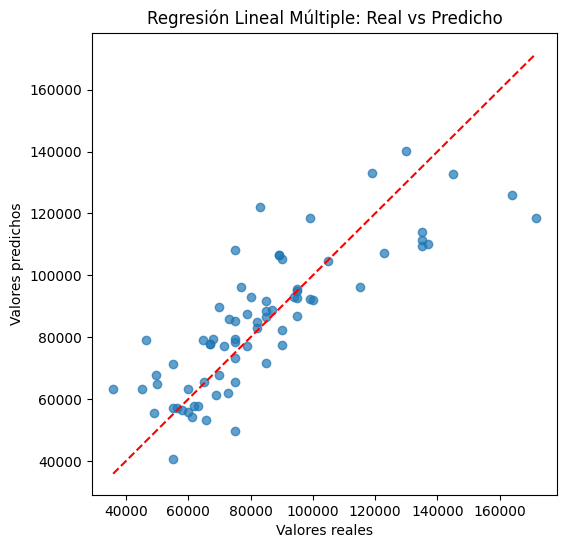

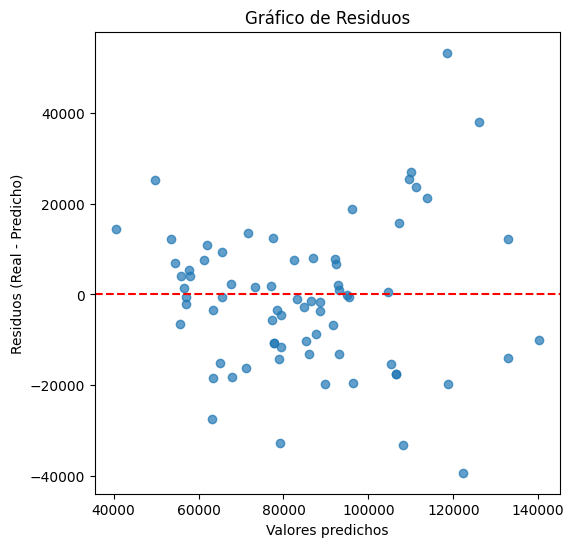

In [56]:
import matplotlib.pyplot as plt

# --- 1. Gráfico Real vs Predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal Múltiple: Real vs Predicho")
plt.show()

# --- 2. Gráfico de Residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos (Real - Predicho)")
plt.title("Gráfico de Residuos")
plt.show()


### **1. Gráfico Real vs Predicho (arriba)**

* **Qué muestra**: En el eje X están los valores reales (`y_test`), y en el eje Y los valores predichos (`y_pred`).
* **La línea roja discontinua**: Representa la **línea ideal** donde las predicciones coinciden exactamente con los valores reales (`y = x`).
* **Interpretación**:

  * Mientras más cerca estén los puntos de esa línea, mejor el modelo.
  * Si los puntos se dispersan mucho, significa que el modelo tiene errores de predicción en esos casos.
  * En el gráfico se ve una tendencia clara siguiendo la línea → el modelo **sí captura la relación** entre las variables, aunque hay cierta dispersión (errores).

---

### **2. Gráfico de Residuos (abajo)**

* **Qué muestra**: En el eje X están los valores predichos, y en el eje Y los residuos (`valor real - valor predicho`).
* **La línea roja horizontal**: Representa el **cero** → el punto donde el valor predicho es igual al valor real.
* **Interpretación**:

  * Los residuos deberían estar distribuidos de manera aleatoria alrededor de 0.
  * Si ves un patrón (por ejemplo, forma de curva, abanico, o tendencia), significa que el modelo no está captando toda la estructura de los datos.
  * En tu caso, los residuos parecen estar dispersos sin un patrón evidente → lo cual es **buena señal**, indica que la regresión lineal es razonable para tus datos.
  * Sin embargo, hay valores con residuos grandes (positivos y negativos), lo que muestra que **en algunos casos el modelo se equivoca bastante**.

---

✅ **Conclusión general de tus gráficos**:

* Tu modelo de regresión lineal múltiple está capturando la relación (los puntos siguen una tendencia lineal).
* Los residuos no muestran un patrón sistemático → no parece haber una fuerte violación de los supuestos de linealidad.
* Sí hay errores grandes en ciertos casos → quizás podrías mejorar el modelo agregando más variables explicativas, transformaciones o probando modelos más complejos.

---

¿Quieres que te explique también **qué supuestos de la regresión lineal** se pueden verificar con estos gráficos? (por ejemplo: homocedasticidad, linealidad, independencia, normalidad de errores).


In [57]:
# cuánto influye cada variable en el precio
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coeficientes.sort_values(by="Coeficiente", ascending=False))

                 Variable   Coeficiente
6       Número de garajes  11654.011608
3             Superficie     980.535122
4  Número de habitaciones    361.870344
1               Trimestre    237.749246
0                     Año   -488.678391
8      Años de antigüedad   -544.153768
7       Piso de ubicación  -2138.912416
5         Número de baños  -2574.630558
2          Tipo de cambio -38363.672226


In [59]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, "dataset_bellavista.pkl")

['dataset_bellavista.pkl']

In [60]:
!ls

BELLAVISTA		 dataset_los_olivos.xlsx  main
dataset_bellavista.pkl	 dataset_magdalena.xlsx   VENTA_INMUEBLE.ipynb
dataset_bellavista.xlsx  MAGDALENA


---

---

In [61]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load("dataset_bellavista.pkl")

# Ahora puedes usarlo directamente
y_pred = modelo_cargado.predict(X_test)

In [62]:
y_pred

array([ 63423.80474614,  61387.71317477, 118434.83419237, 111270.09940315,
        63418.00272957,  49772.21868049, 107260.22049007,  88616.56837516,
        61924.41947409, 110036.05984922,  84846.95707526,  65592.46354248,
        73315.43731082,  63205.48422824,  55562.50944754,  77039.43974926,
        79261.02099597,  64984.56789007,  67729.98207552,  77673.10910973,
        71548.14152708,  86964.16011075, 122234.70389046,  40504.01180491,
       109524.75971121, 132968.38276036,  85316.790809  ,  96150.95460411,
        56497.38839104,  95020.70311141,  55924.00780744,  92842.90374347,
        65628.06524865, 126021.07277527,  89746.56494601,  53392.00221356,
        78489.66733866,  82418.46954058,  79536.49135048,  88722.36902348,
       140082.93365649,  95525.92646406,  93151.23070574,  77673.10910973,
        92379.56927032,  54386.07094137, 106438.08783748,  71247.98602946,
        79463.14333269, 118664.78850401,  79000.69722934,  57113.67066331,
        57113.67066331,  

In [63]:
X_test

,Año,Trimestre,Tipo de cambio,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
227,2023,2,3.699146,51,2,1,0,0.000000,5
42,2021,3,4.044573,74,3,2,0,0.000000,24
256,2023,4,3.780165,120,4,2,0,0.000000,20
182,2023,1,3.818142,131,4,2,0,0.000000,49
56,2021,3,4.044573,72,2,2,0,0.000000,16
333,2024,4,3.755779,48,1,1,0,0.000000,20
15,2021,1,3.659334,94,3,2,0,0.006192,2
57,2021,3,4.044573,94,3,2,0,0.000000,10
140,2022,4,3.894966,56,2,2,0,0.000000,0
294,2024,2,3.742923,108,3,2,0,0.000000,14


---

In [ ]:
df_nuevo = pd.read_excel("b1.xlsx")
df_nuevo.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)
df_nuevo = df_nuevo.fillna(df_nuevo.mean(numeric_only=True))

In [159]:
# Separar X (las features) -> NO debe incluir "Precio en soles corrientes"
X_new = df_nuevo.drop(columns=["Precio en soles corrientes"], errors="ignore")

y_pred = modelo_cargado.predict(X_new)

In [160]:
y_pred

array([488182.11939131])